In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target,columns=['species'])
target_df.head()

,species
0,0
1,0
2,0
3,0
4,0


In [6]:
def converter(species):
    if species==0:
        return 'setosa'
    elif species==1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
iris_df = pd.concat([iris_df,target_df],axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [7]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


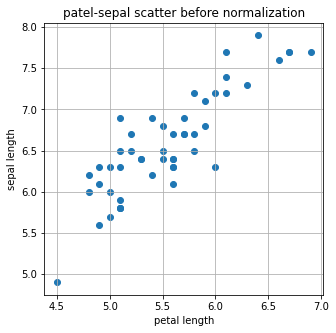

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title("patel-sepal scatter before normalization")
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.grid()
plt.show()

# 0-1로 normalization을 해주는 minmax_scale

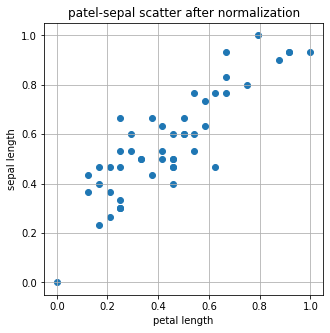

In [12]:
from sklearn.preprocessing import minmax_scale
X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)
plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title("patel-sepal scatter after normalization")
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.grid()
plt.show()

# 같은 데이터로 간단한 회귀 문제를 풀면서 Regularization에 대해 알아보겠습니다.

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

linear = LinearRegression()
linear.fit(X.reshape(-1,1),Y)
a,b = linear.coef_,linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


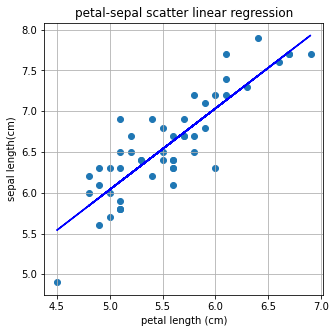

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title("petal-sepal scatter linear regression")
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length(cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


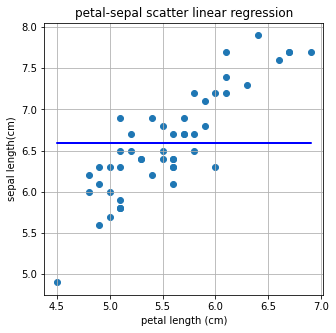

In [15]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1),Y)
a,b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title("petal-sepal scatter linear regression")
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length(cm)')
plt.grid()
plt.show()


## Ridge

기울기 : 0.93, 절편 : 1.41


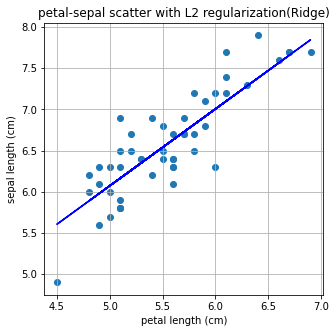

In [16]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()